# Programming Assignment: Function Approximation 
1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pylab as plt

%matplotlib inline

# Task №1
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [2]:
def f(x):
    f = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
    return f

In [3]:
def polynomial_first_degree(coef, x):
    return coef[0] + coef[1]* x

In [4]:
X = np.arange(1, 15, 0.1)
Y = [f(x) for x in X]

In [5]:
def make_coef(border_points, n):
    A = np.zeros((n, n))
    B = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            A[i, j] = border_points[i] ** j
    B = np.array([f(x) for x in border_points])
    return A, B

In [6]:
n = 2
border_points = np.array([1, 15])

A, B = make_coef(border_points, n)
print(A, "\n", B)

[[ 1.  1.]
 [ 1. 15.]] 
 [3.25221687 0.63522142]


In [7]:
coef_first_degree = linalg.solve(A, B)
print(coef_first_degree)

[ 3.43914511 -0.18692825]


In [8]:
result_1 = np.array([polynomial_first_degree(coef_first_degree, x) for x in X])

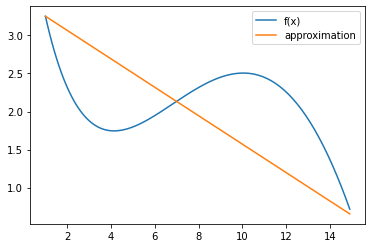

In [9]:
plt.plot(X, Y, X, result_1)
plt.legend(['f(x)', 'approximation'])
plt.show()

# Task №2
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [10]:
def polynomial_second_degree(coef, x):
    return coef[0] + coef[1]* x + coef[2] * np.power(x, 2)

In [11]:
n = 3
border_points = np.array([1, 8,15])

A, B = make_coef(border_points, n)
print(A, "\n", B)

[[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]] 
 [3.25221687 2.31617016 0.63522142]


In [12]:
coef_second_degree = linalg.solve(A, B)
result_2 = np.array([polynomial_second_degree(coef_second_degree, x) for x in X])

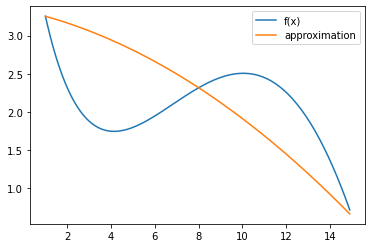

In [13]:
plt.plot(X, Y, X, result_2)
plt.legend(['f(x)', 'approximation'])
plt.show()

# Task №3
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


In [14]:
def polynomial_third_degree(coef, x):
    return coef[0] + coef[1]* x + coef[2] * np.power(x, 2) + coef[3] *np.power(x, 3)

In [15]:
n = 4
border_points = np.array([1, 4, 10, 15])

A, B = make_coef(border_points, n)
print(A, "\n", B)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]] 
 [3.25221687 1.74684595 2.50541641 0.63522142]


In [16]:
coef_third_degree = linalg.solve(A, B)
result_3 = np.array([polynomial_third_degree(coef_third_degree, x) for x in X])

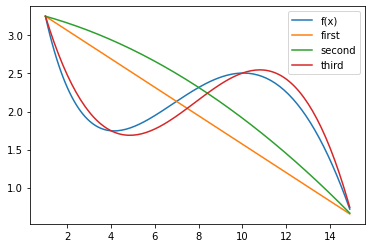

In [17]:
plt.plot(X, Y, X, result_1, X, result_2,X, result_3)
plt.legend(['f(x)', 'first', 'second', 'third'])
plt.show()

# Task №4
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [18]:
with open('answer_2.txt', 'w') as fileAnswer:
    for item in coef_third_degree:
        fileAnswer.write(str(item) + ' ')